In [2]:
from functions import geopack_wrapper
from functions import data_preprocess_functions
import pandas as pd
import importlib


%matplotlib inline

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.patches import Wedge, Circle
import cartopy.crs as ccrs
import numpy as np

from geopack import geopack

Load IGRF coefficients ...


In [3]:
dir_name = 'idl_plots/output_sc1_sp3_120sec_multi_pa2_en2_subtraction_reduced_removebi_flux0.500.751.00_pap3.02.01.1/'

model = "t89"

dispersion_filename = dir_name + 'dispersion_20160101_to_20201231.csv'

In [4]:
dispersion_list = pd.read_csv(dispersion_filename)
dispersion_list = data_preprocess_functions.preprocess_dispersion_list(dispersion_list)

dispersion_list = dispersion_list.drop(dispersion_list[dispersion_list['kp'].isna()].index)

# importlib.reload(geopack_wrapper)

dispersion_list['model_field_line_length_python'] = dispersion_list.apply(geopack_wrapper.get_magnetic_model, model = model, axis=1)

dispersion_list[['datetime_str', 'model_field_line_length_python']].to_csv('output/'+model+'_geopack.csv')

In [5]:
dispersion_list.loc[:,['xgsm','ygsm','zgsm','flag','kp','bias']]

,xgsm,ygsm,zgsm,flag,kp,bias
0,4.767768,-6.506135,-1.886437,1.0,2.000000,0.556990
4,3.416315,-9.172293,-4.863153,1.0,0.700000,0.347211
5,-0.878291,-6.484606,-1.913434,1.0,2.141667,0.324574
6,-0.569768,-7.316892,-2.389341,1.0,1.930000,0.247189
8,-0.975829,-9.126391,-3.908932,1.0,0.700000,0.770429
...,...,...,...,...,...,...
110,-5.649227,-15.315127,-2.761812,-1.0,0.700000,0.412552
112,-6.643211,9.459228,3.107944,-1.0,2.700000,0.458598
113,1.447742,4.535451,2.805954,-1.0,4.000000,0.476119
114,1.107725,5.338172,2.899096,-1.0,4.000000,0.450230


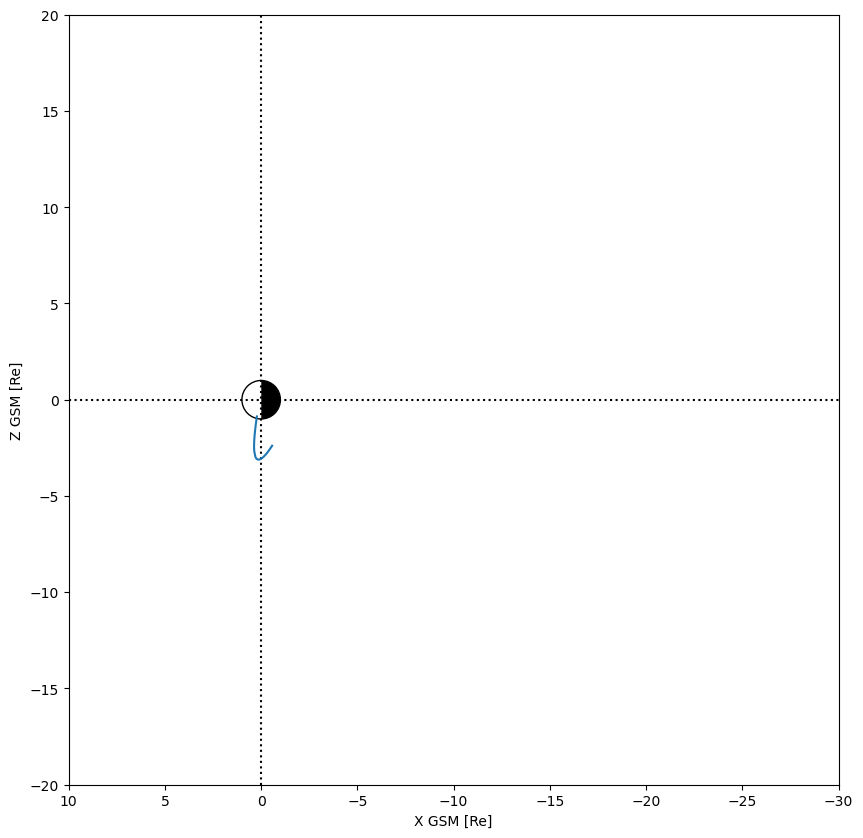

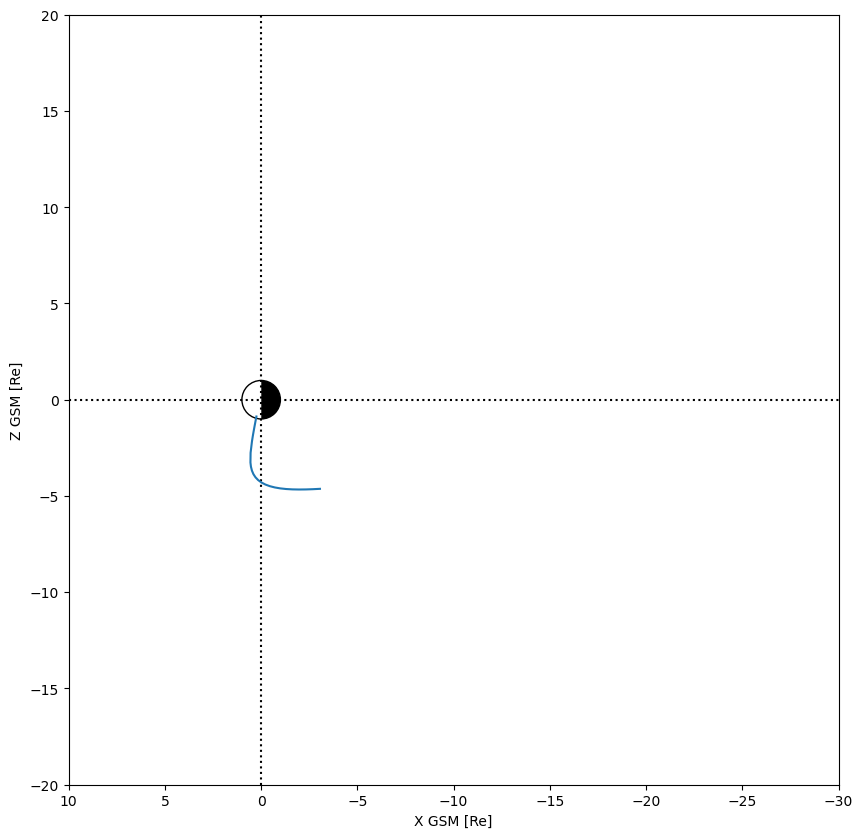

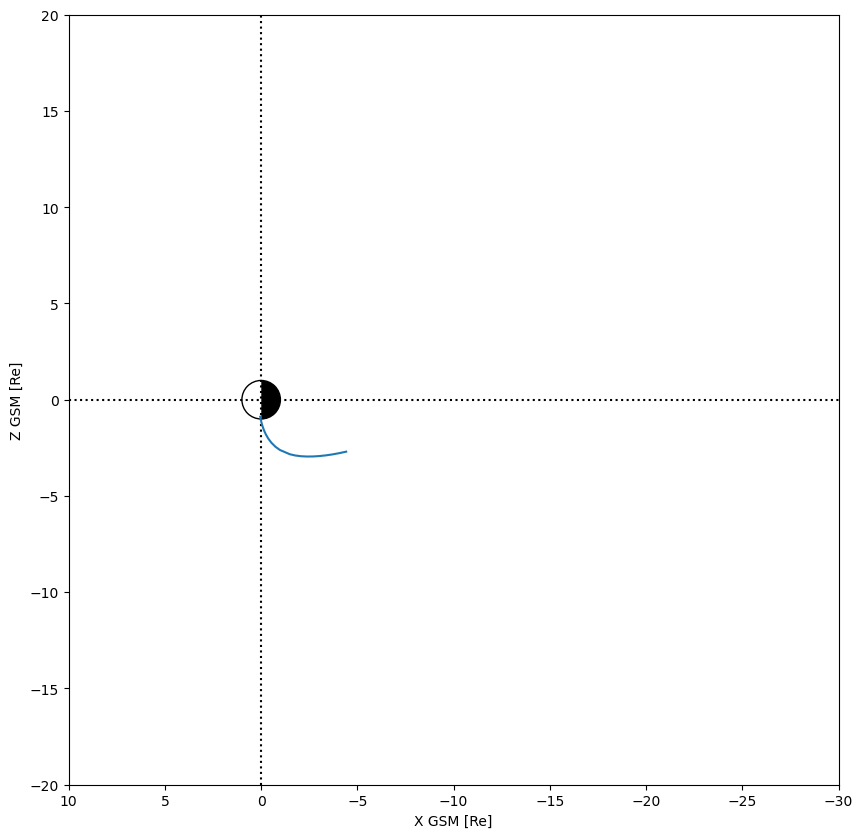

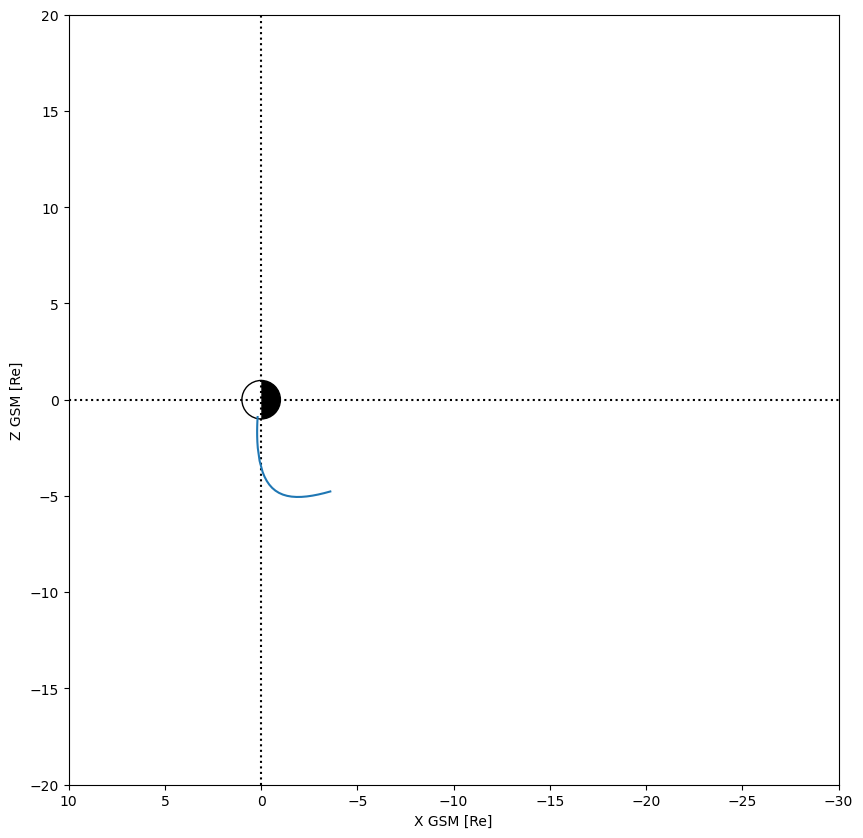

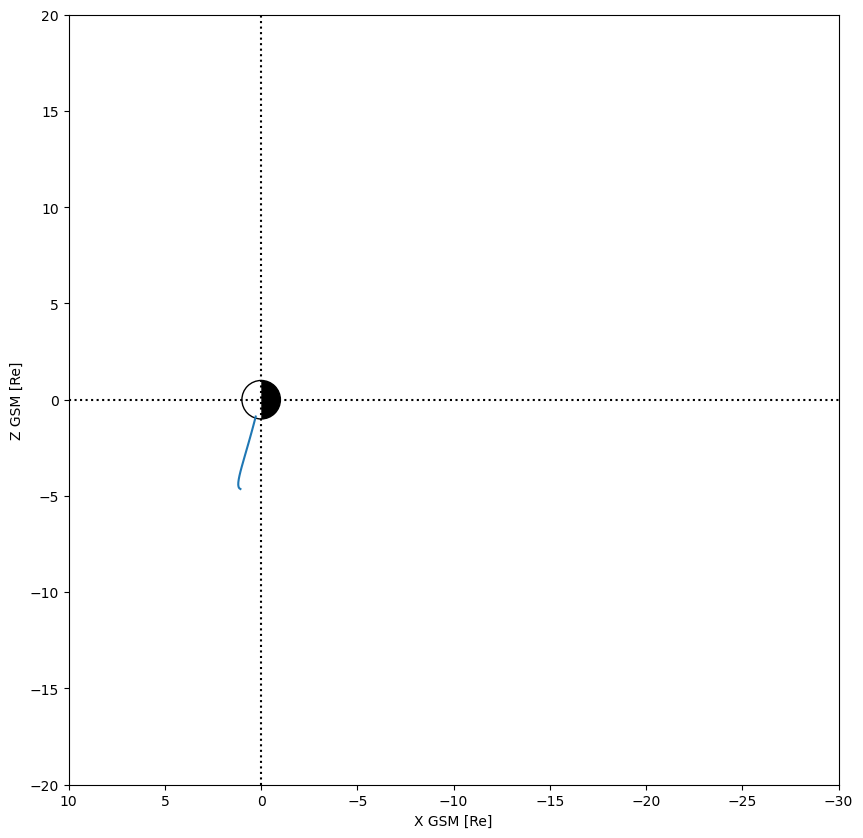

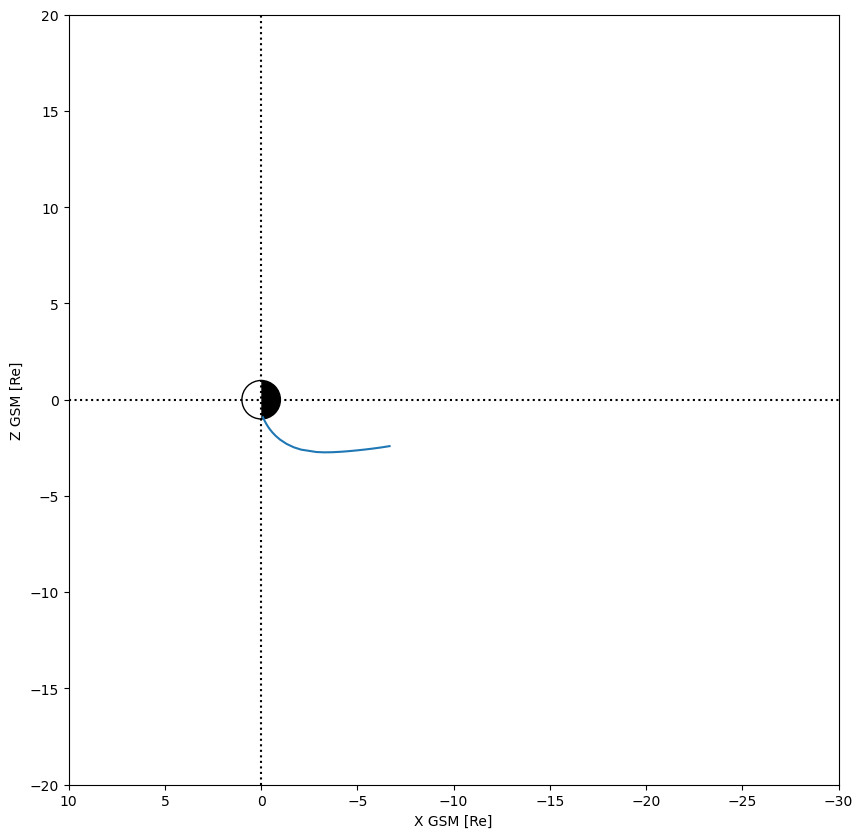

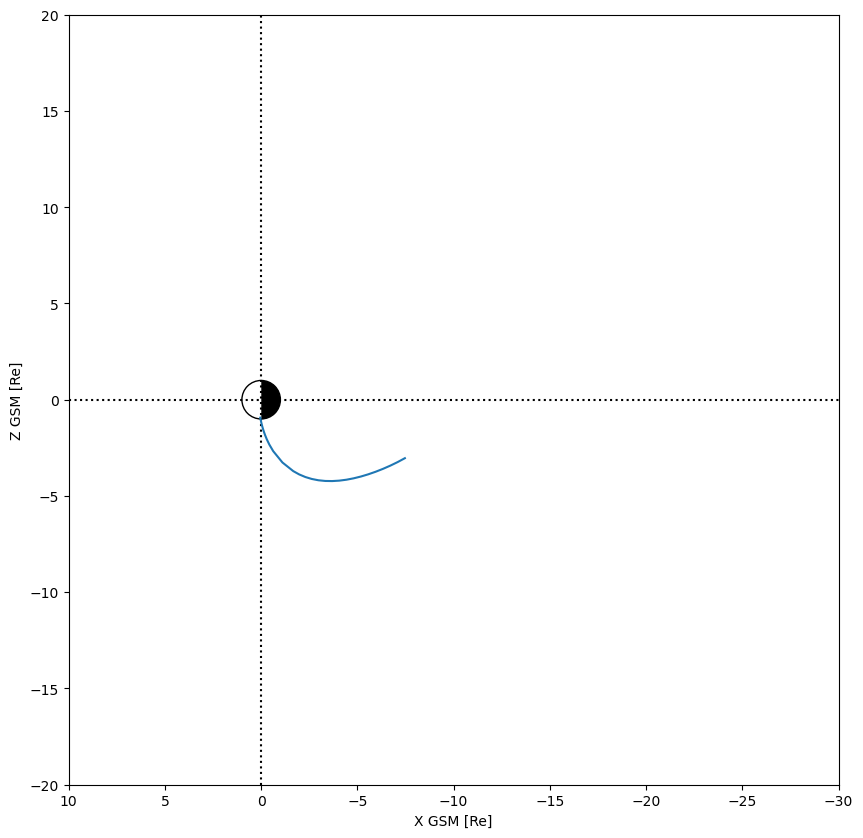

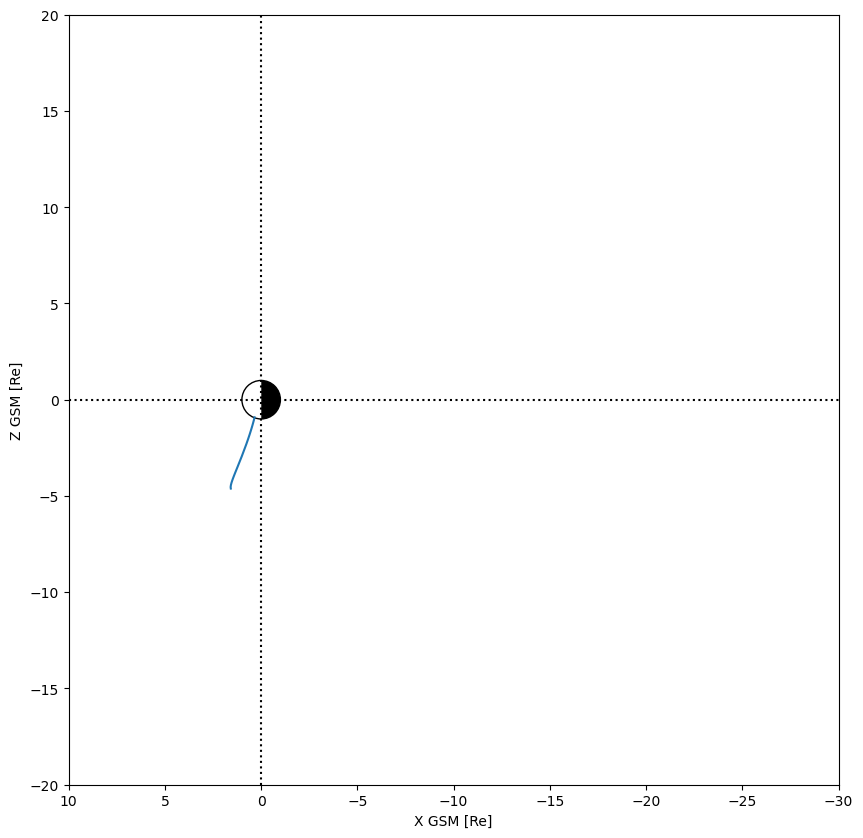

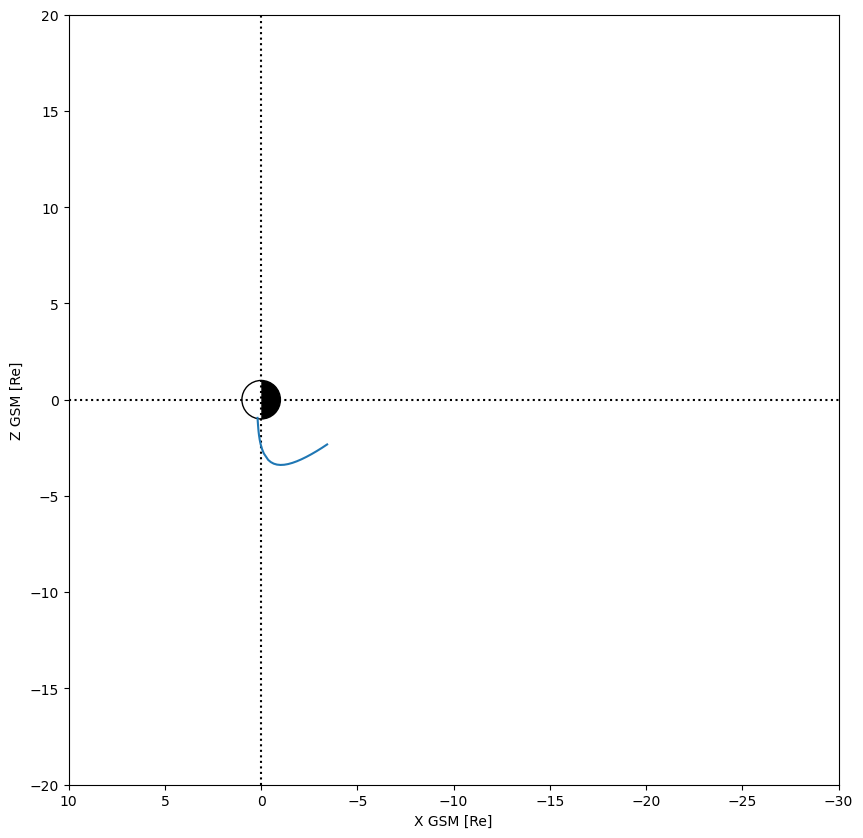

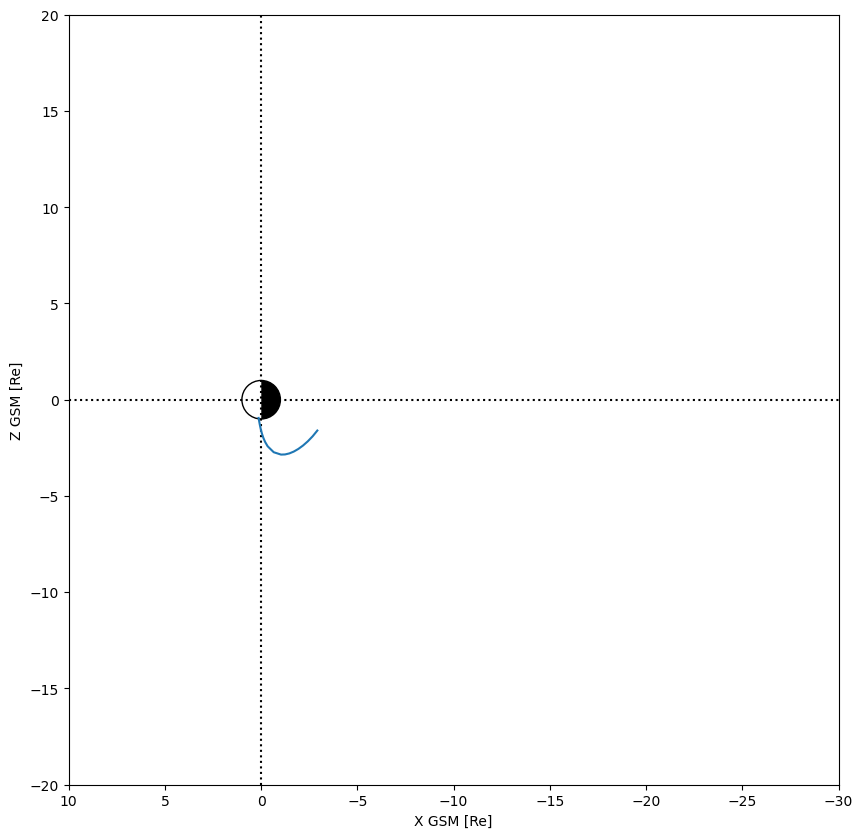

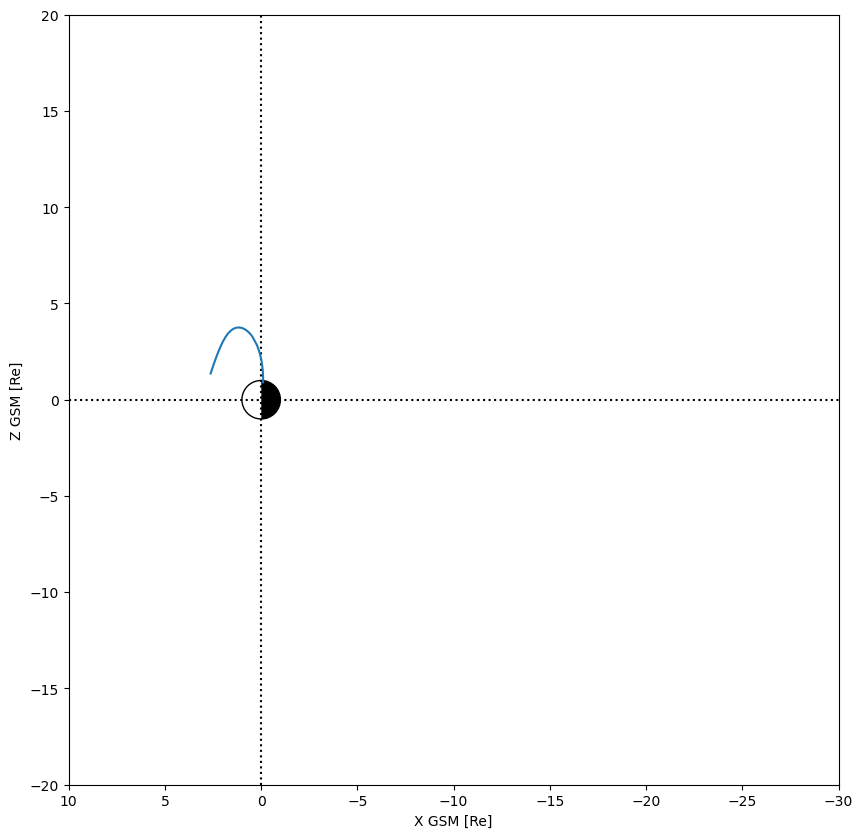

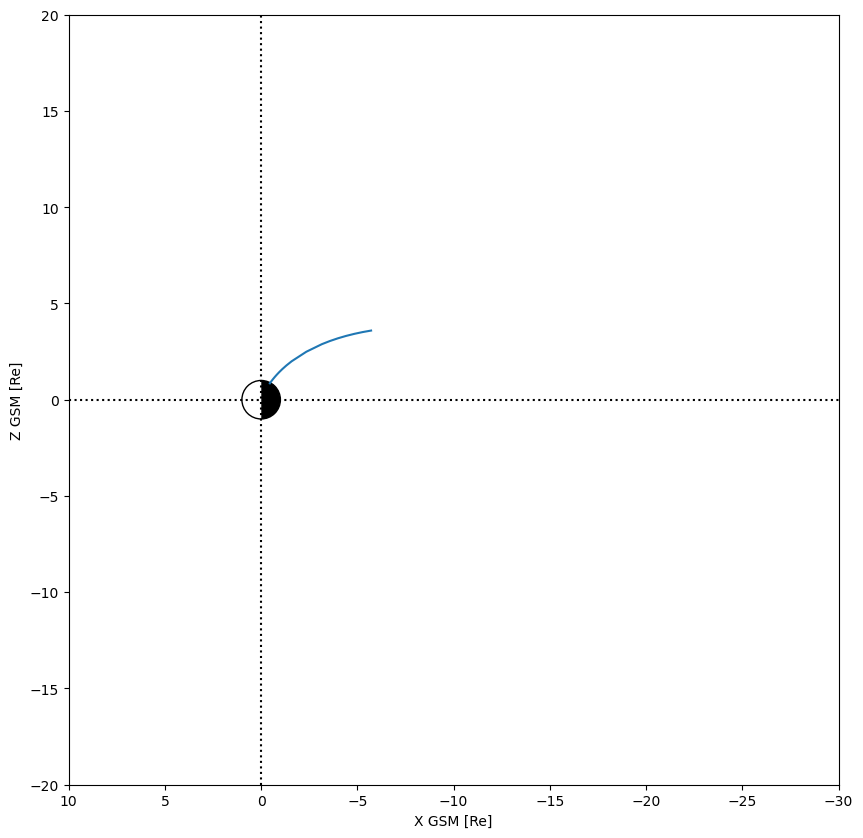

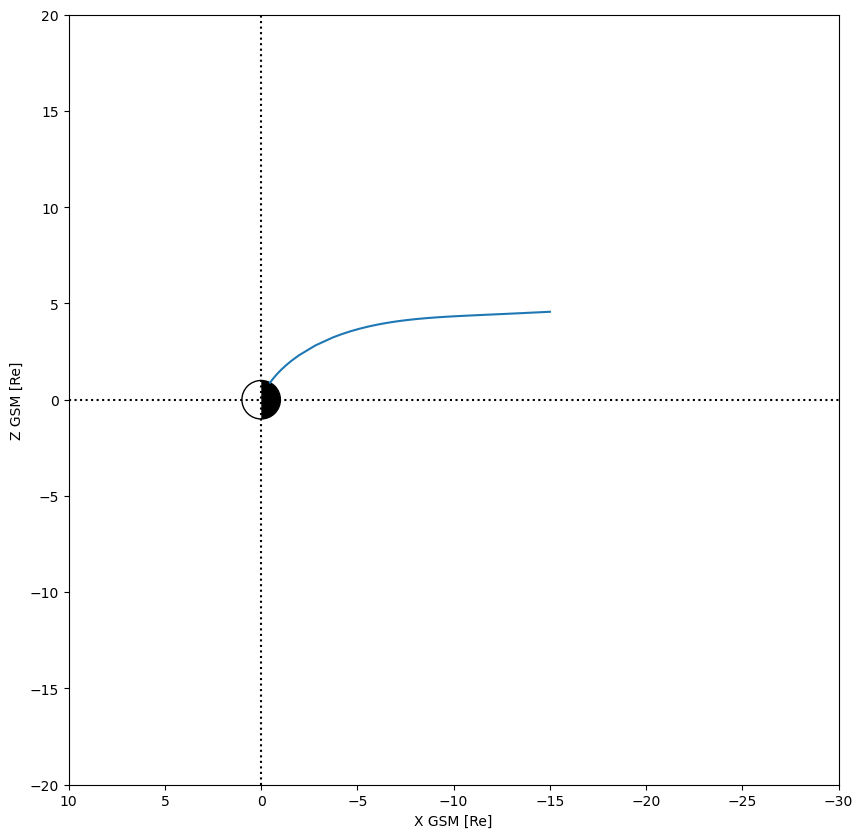

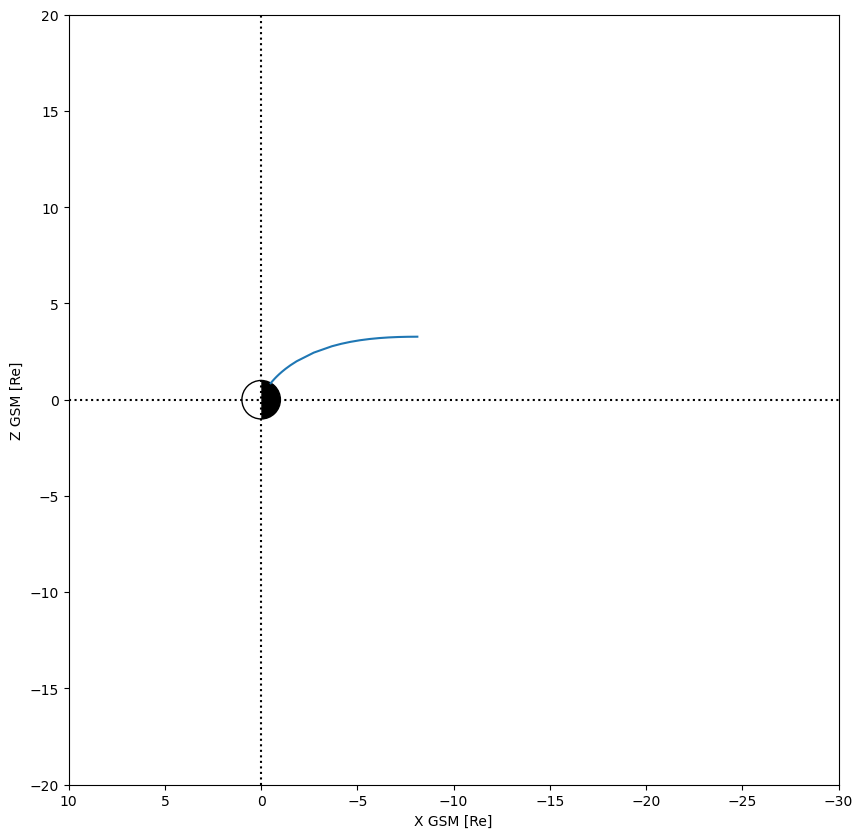

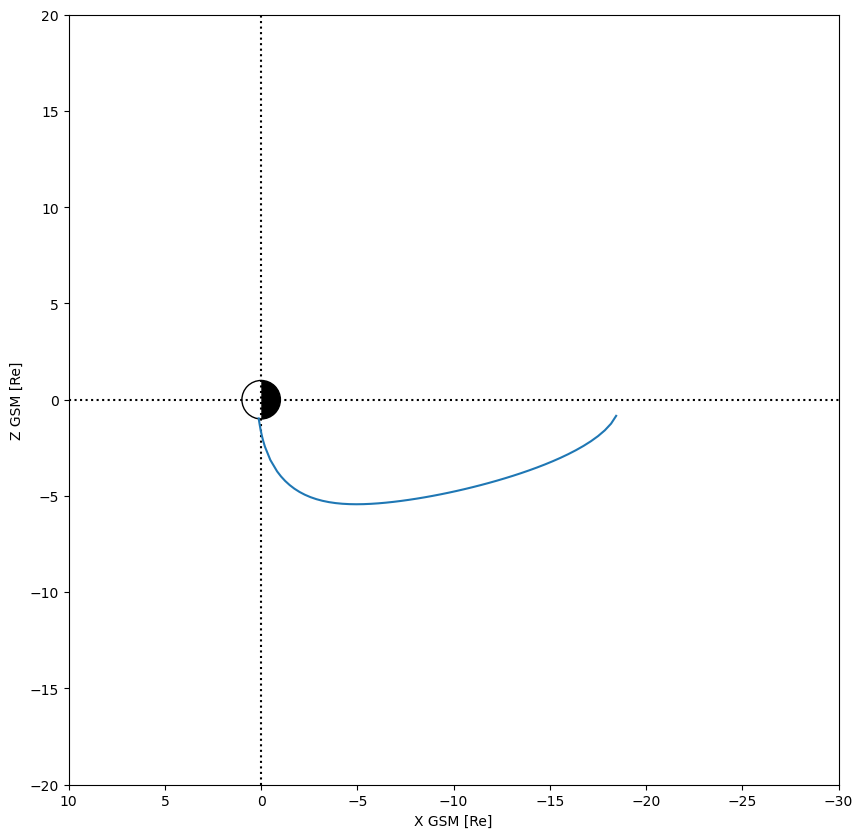

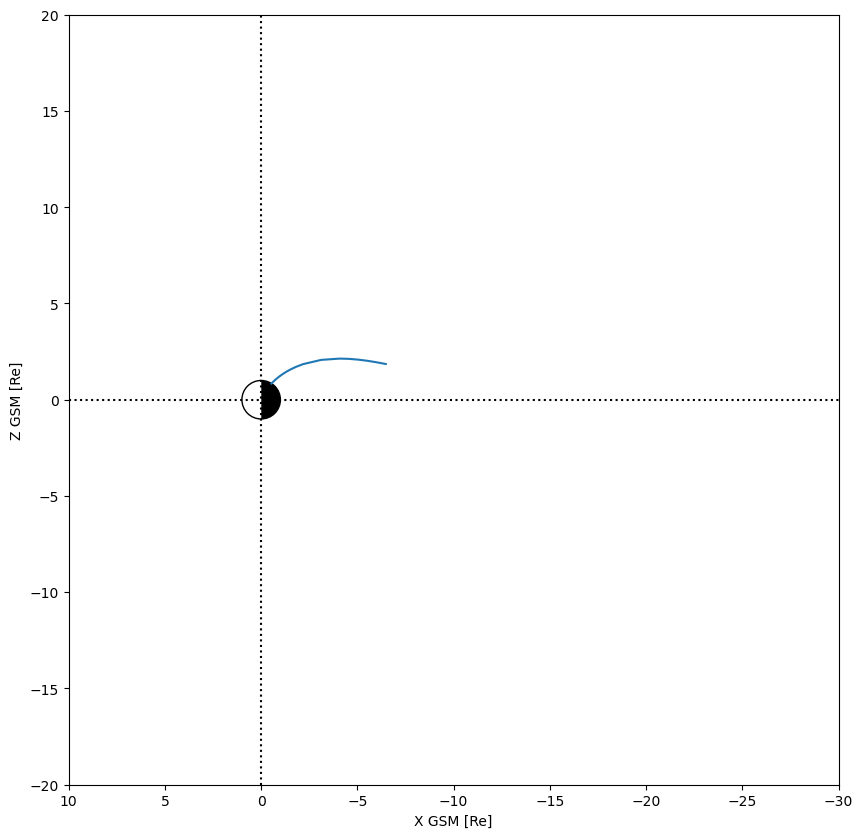

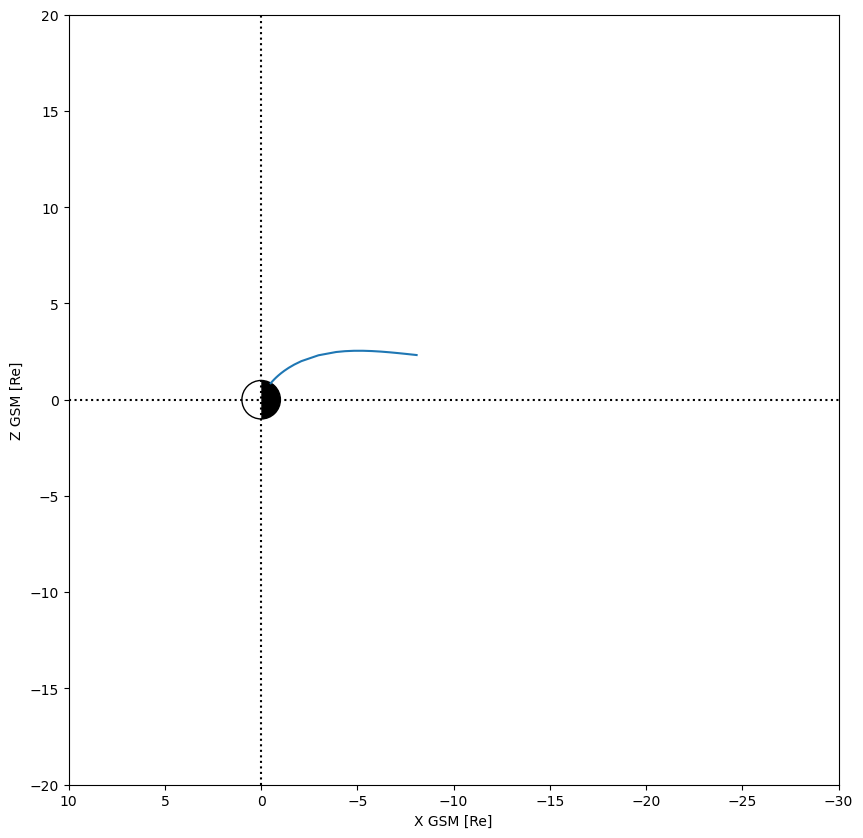

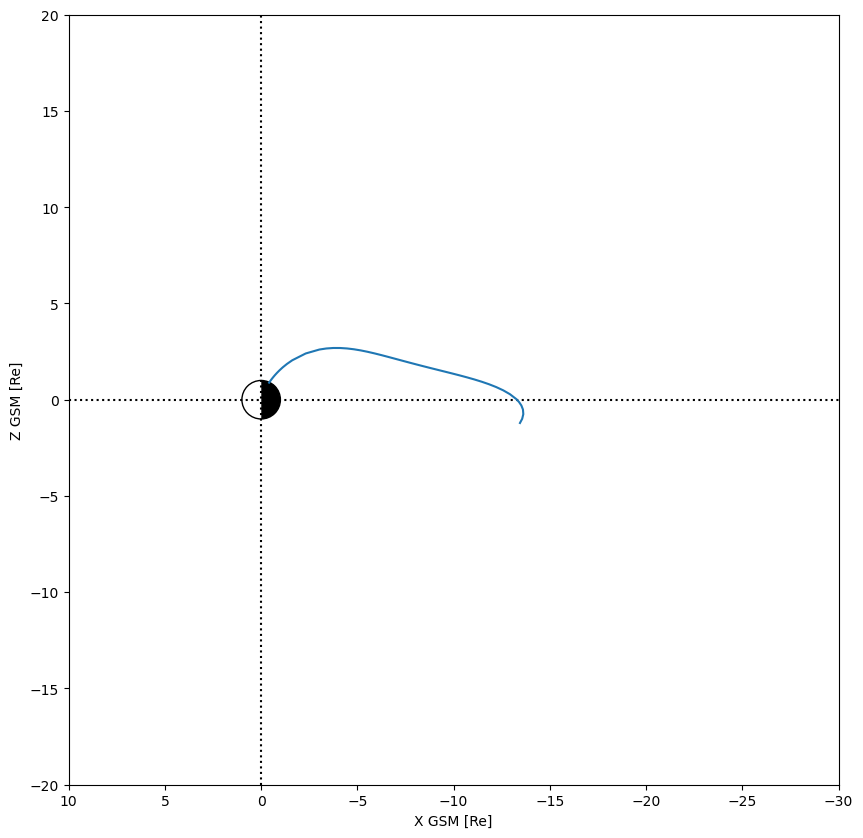

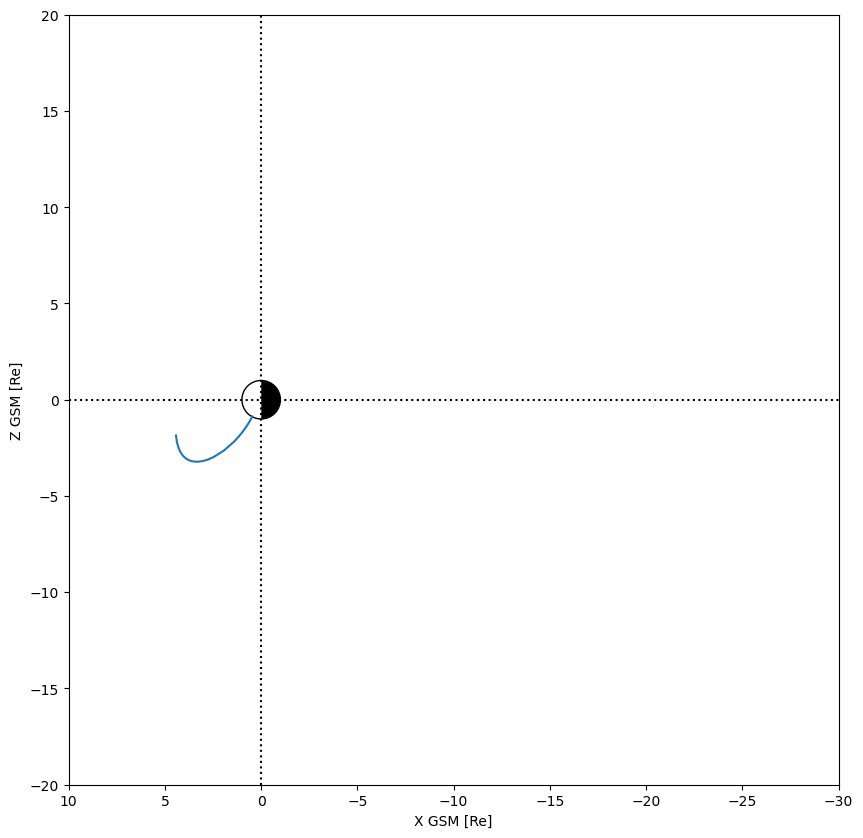

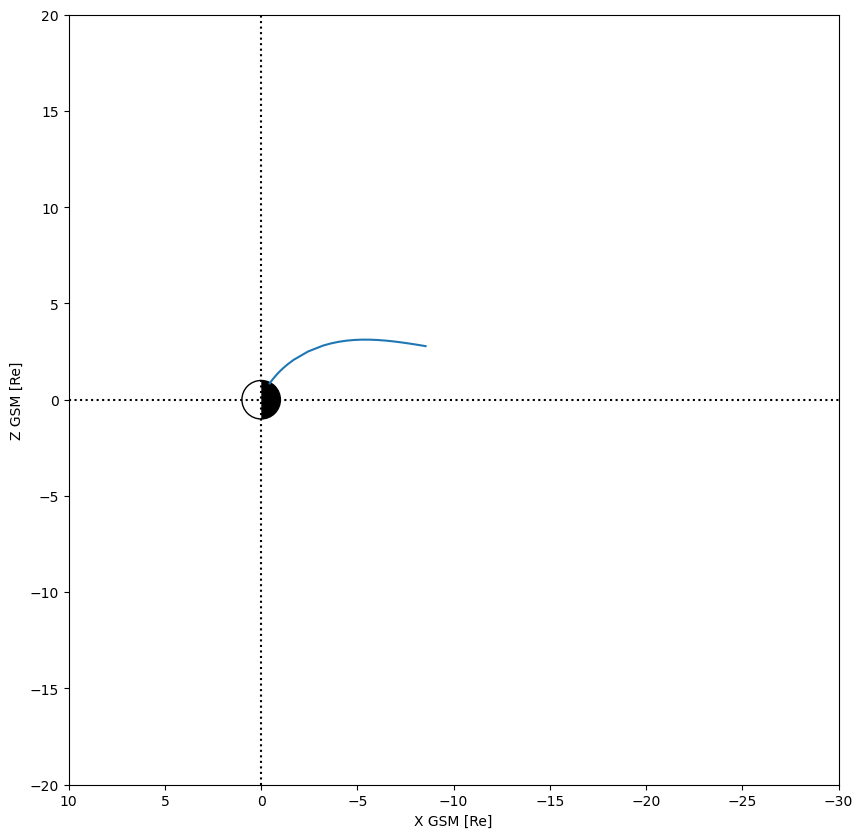

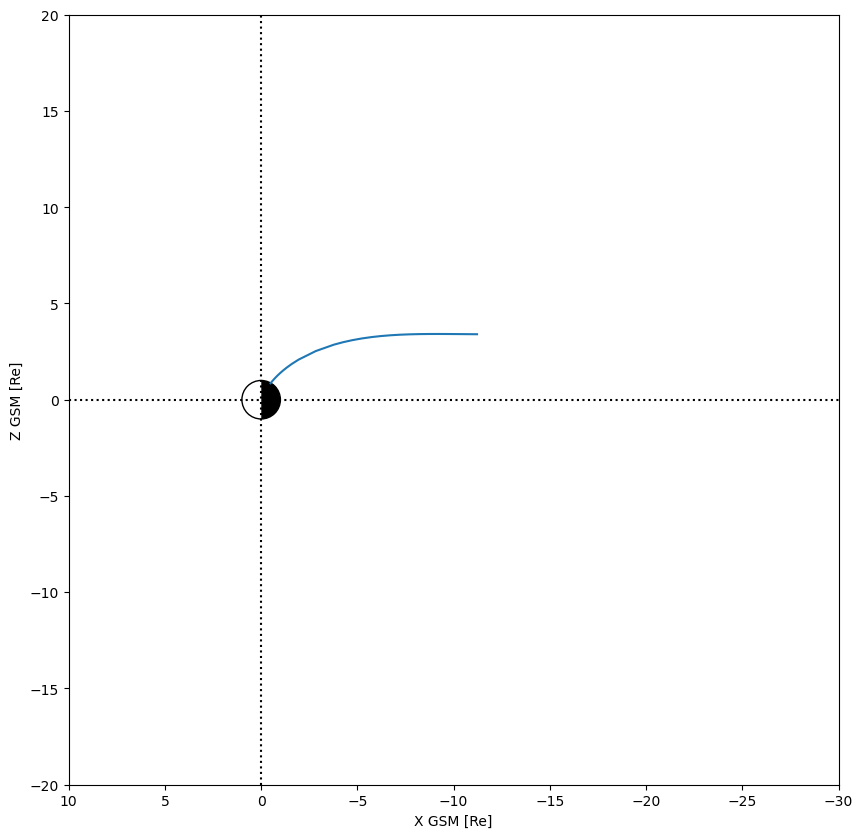

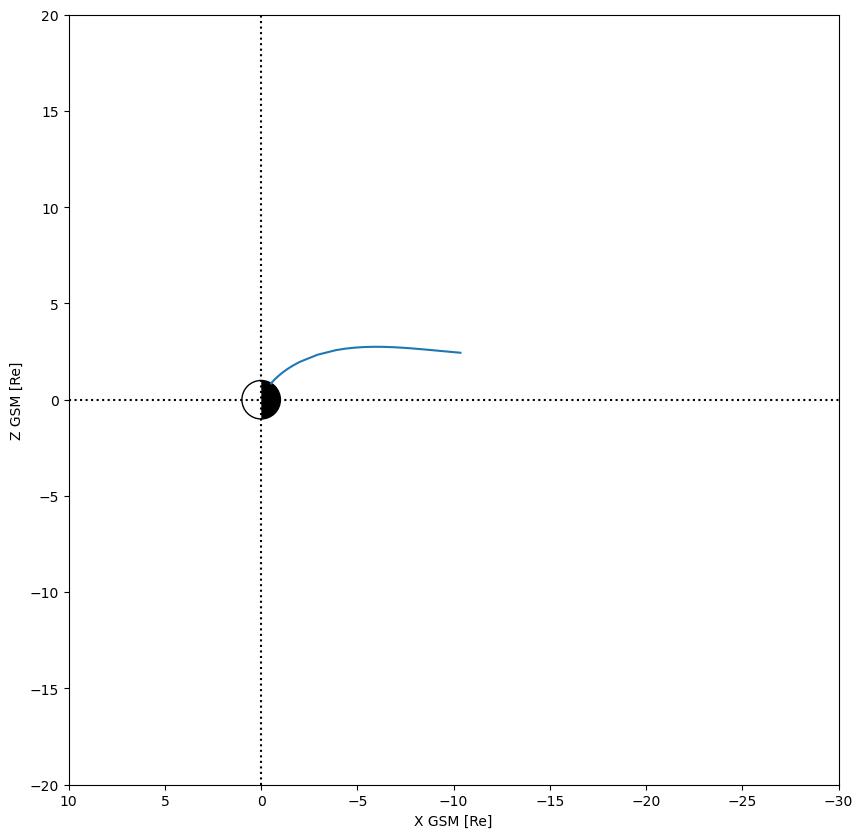

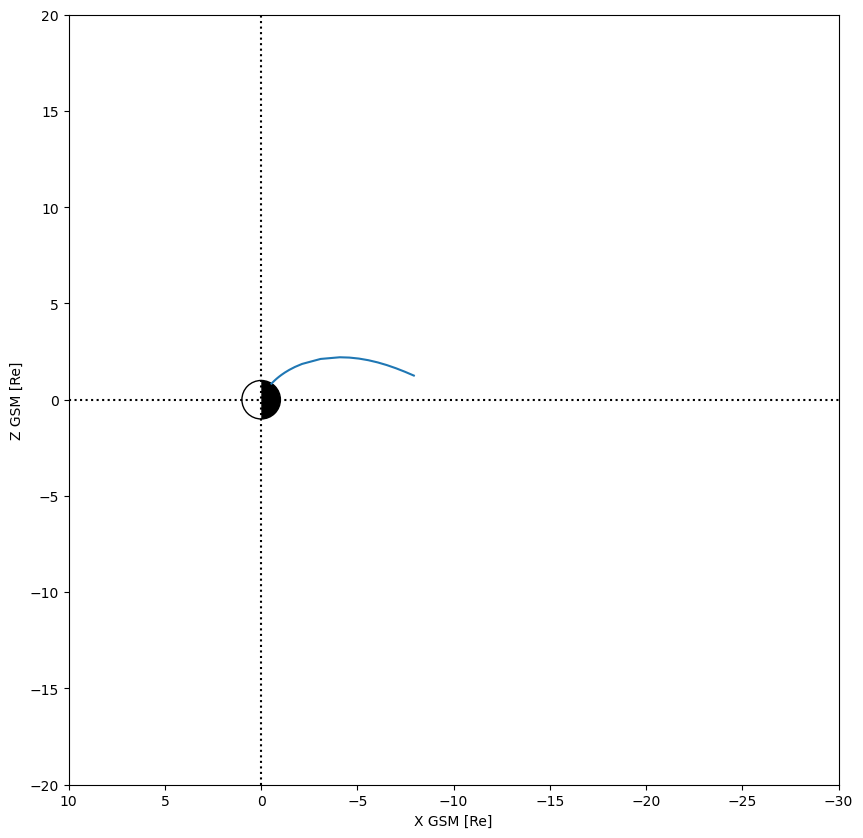

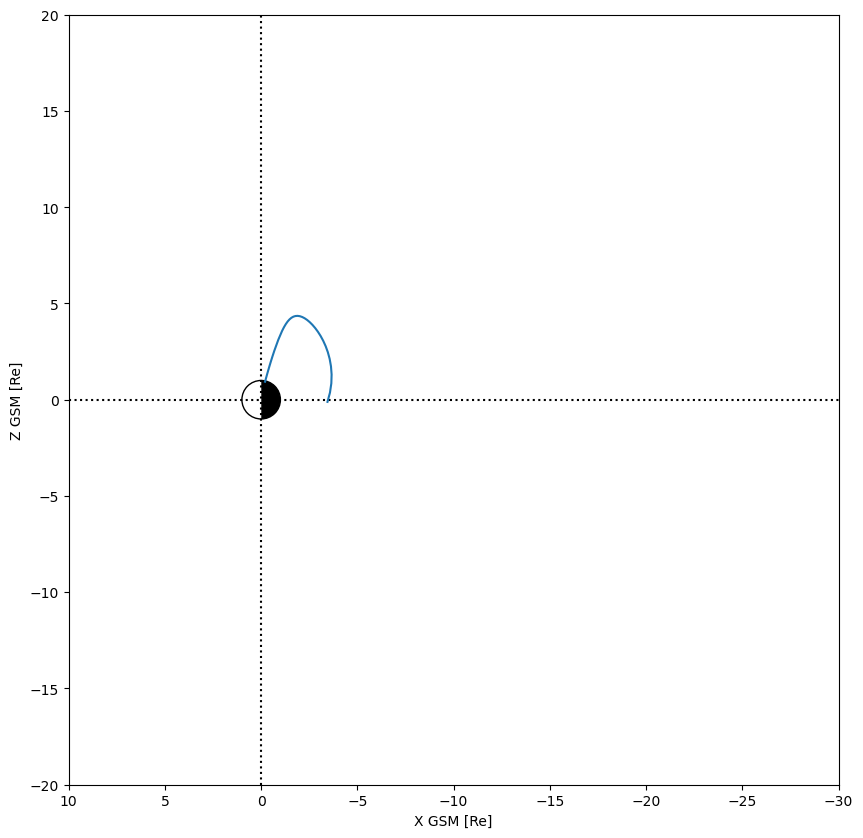

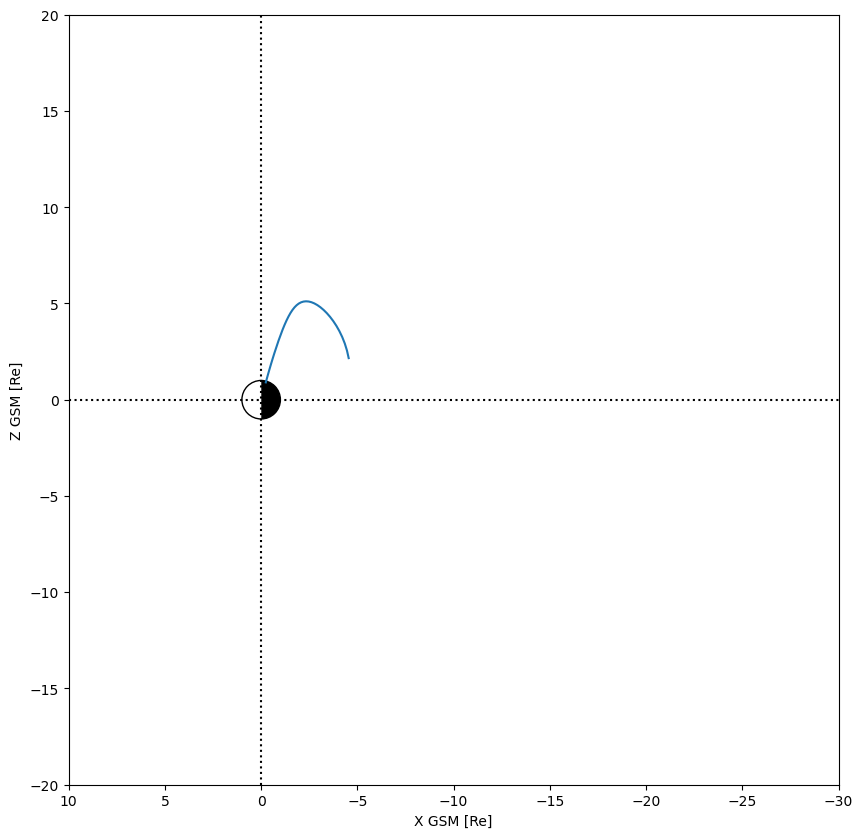

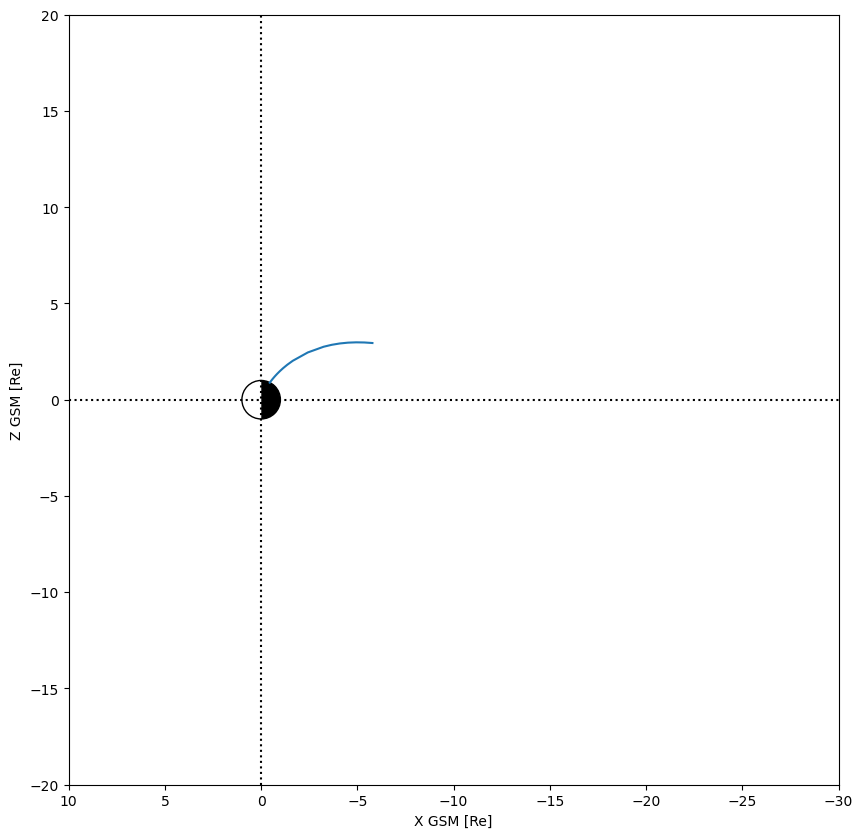

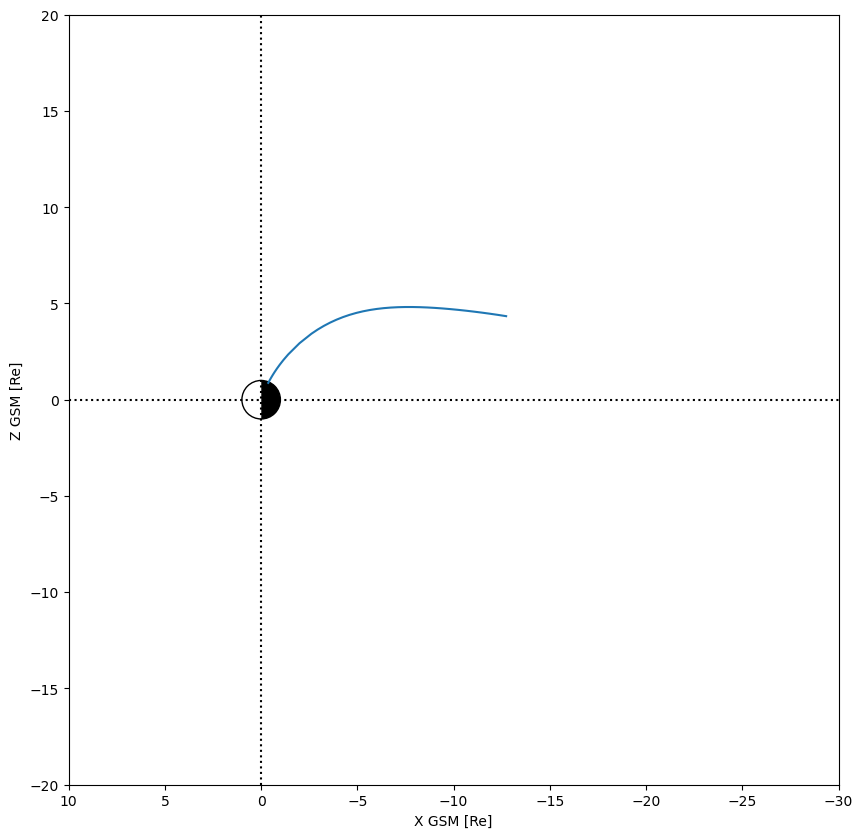

In [8]:
index_t = (dispersion_list['temporal_dispersion']) & (dispersion_list['region'] != 'Dayside') & (dispersion_list['region'] != 'Lobe') # & ((dispersion_list['mlt'] > 18) | (dispersion_list['mlt'] < 6))

for index in dispersion_list.loc[index_t,:].index:
    print,index
    x_gsm,y_gsm,z_gsm,direction,kp = dispersion_list.loc[index,['xgsm','ygsm','zgsm','flag','kp']]

    x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=direction,rlim=100,r0=.99999,parmod=int(kp),exname='t89',inname='igrf',maxloop=10000)

    ax=geopack_wrapper.setup_fig()

    ax.plot(xx,zz)

    plt.show()

In [ ]:
index_t = (dispersion_list['temporal_dispersion']) & ((dispersion_list['region'] == 'BL') | (dispersion_list['region'] == 'PS')) 



for index in dispersion_list.loc[index_t,:].index:
    x_gsm,y_gsm,z_gsm,direction,kp = dispersion_list.loc[index,['xgsm','ygsm','zgsm','flag','kp']]

    x,y,z,xx,yy,zz = geopack.trace(x_gsm,y_gsm,z_gsm,dir=direction,rlim=100,r0=.99999,parmod=int(kp),exname='t89',inname='igrf',maxloop=10000)
    
    
    